Import Modules

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Listing all INPUT files in input folder

In [1]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\DELL\Downloads\Machine-l-project\Model-training\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\DELL\Downloads\Machine-l-project\Model-training\input\Toddler Autism dataset July 2018.csv
C:\Users\DELL\Downloads\Machine-l-project\Model-training\input\Toddler data description.docx


In [4]:
#-----------------------------LOAD DATASET USING PANDAS-----------------------------

data = pd.read_csv(r'C:\Users\DELL\Downloads\Machine-l-project\Model-training\input\Toddler Autism dataset July 2018.csv')

#----------------------------Check for missing values----------------------
print(data.isnull().sum())

# --------------------- Remove missing values in panda using dropna func. ---------------------
data = data.dropna()


Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64


In [5]:
#-----------------Adjusting column names-----------------

data.columns = ['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class/ASD_Traits']

In [6]:
data.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class/ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [7]:
#------------------------Drop not required columns (case_no,qchat-10-score:sum for A's---------------)

data = data.drop(columns=['Case_No','Qchat-10-Score'])




In [8]:
#---------------Print all unique values of datasets ---------------------------

for columname in data.columns:

    print("{columname} : {uniquevalues}".format(columname = columname,
    uniquevalues = ",".join(map(str,data[columname].unique()))))

print("Number of Records:{Number_col} \nNumber of Features:{Number_row}".format(Number_col=data.shape[0],Number_row=data.shape[1]))

A1 : 0,1
A2 : 0,1
A3 : 0,1
A4 : 0,1
A5 : 0,1
A6 : 0,1
A7 : 1,0
A8 : 1,0
A9 : 0,1
A10 : 1,0
Age_Mons : 28,36,24,20,21,33,22,17,25,15,18,12,29,35,32,19,14,13,30,23,34,26,31,27,16
Sex : f,m
Ethnicity : middle eastern,White European,Hispanic,black,asian,south asian,Native Indian,Others,Latino,mixed,Pacifica
Jaundice : yes,no
Family_mem_with_ASD : no,yes
Who_completed_the_test : family member,Health Care Professional,Health care professional,Self,Others
Class/ASD_Traits : No,Yes
Number of Records:1054 
Number of Features:17


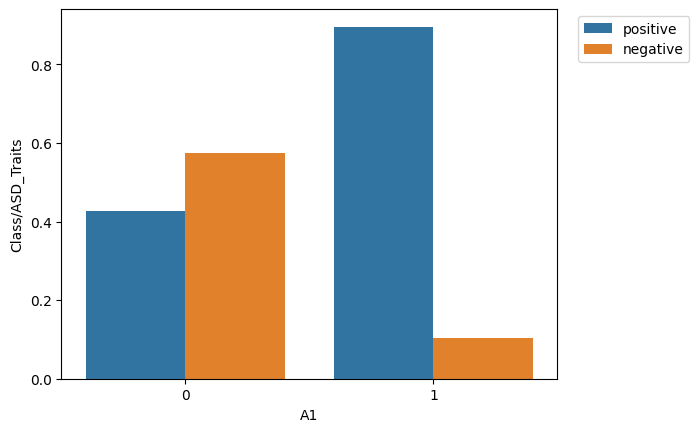

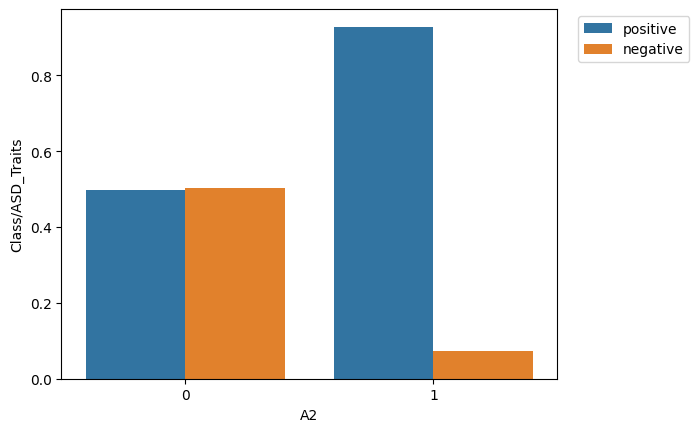

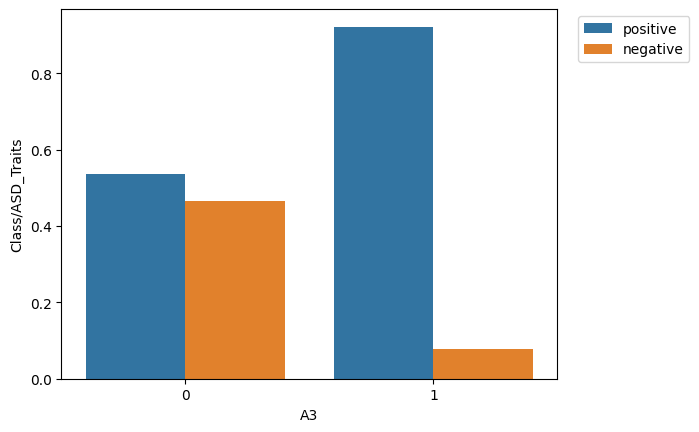

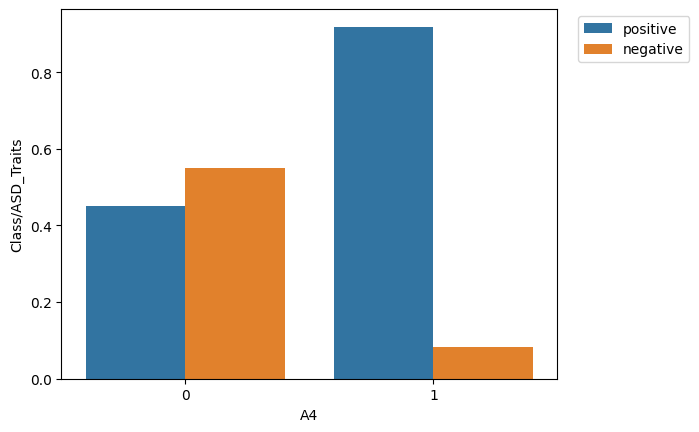

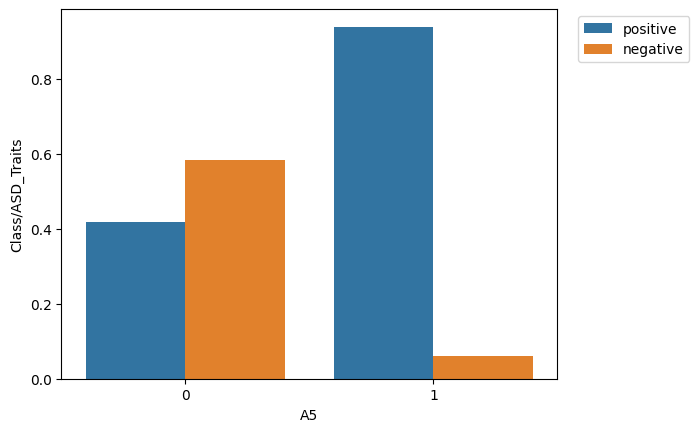

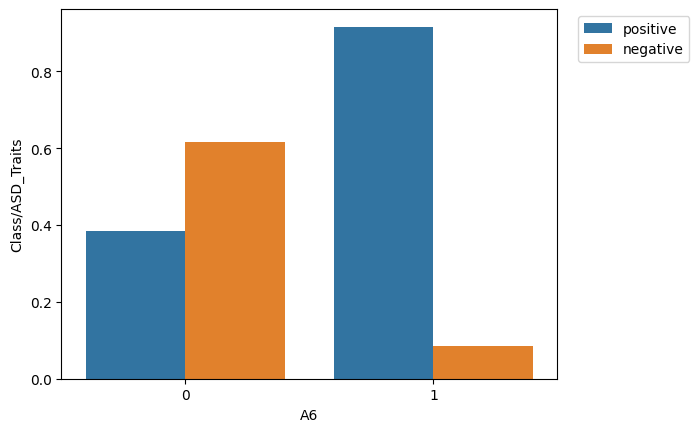

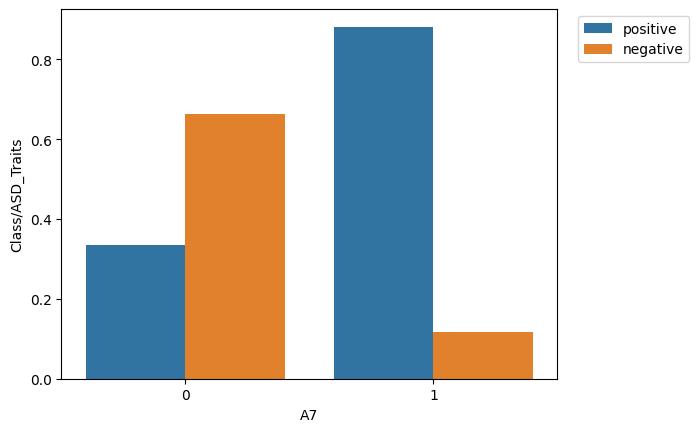

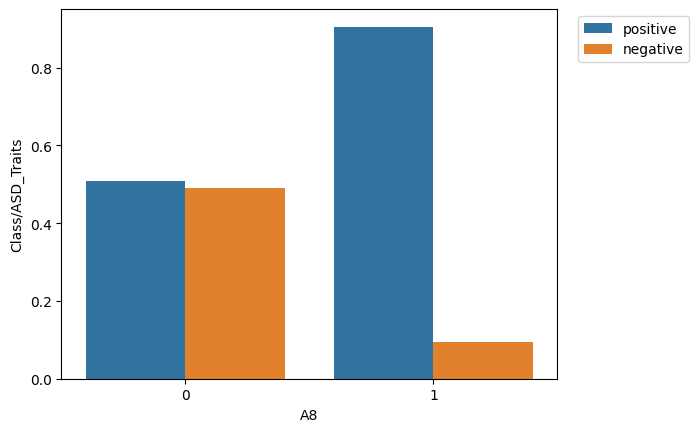

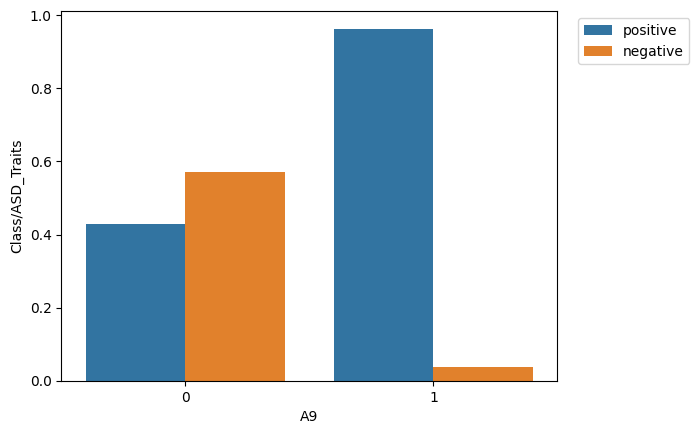

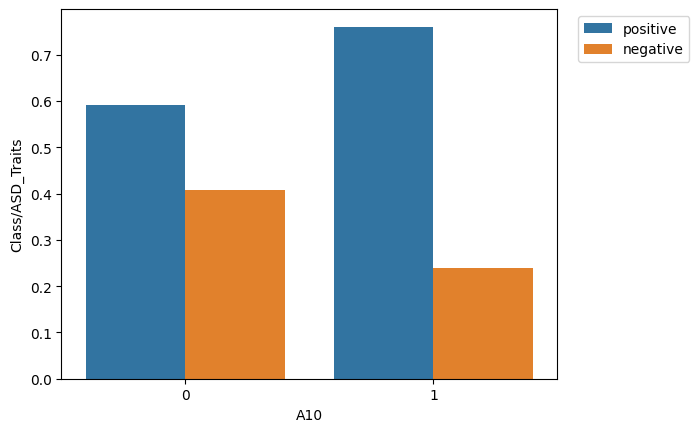

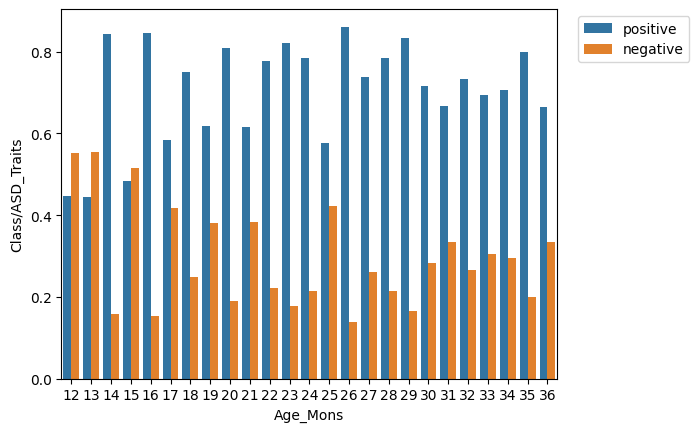

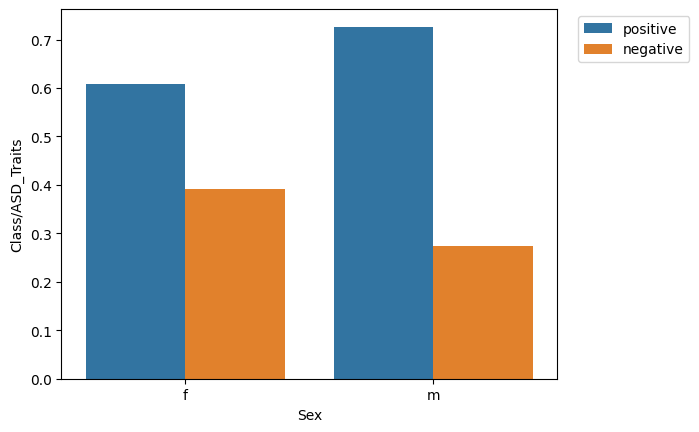

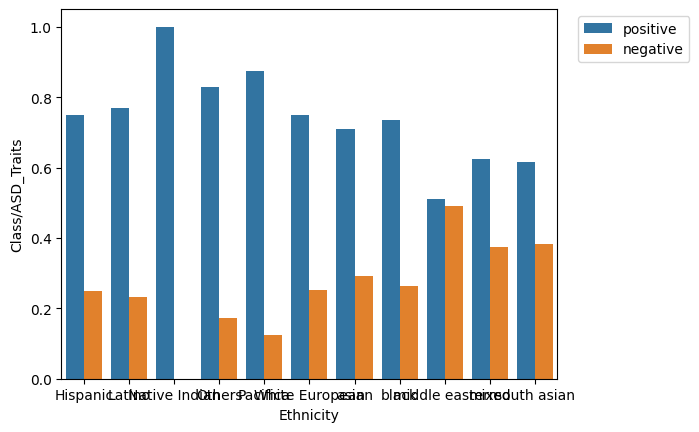

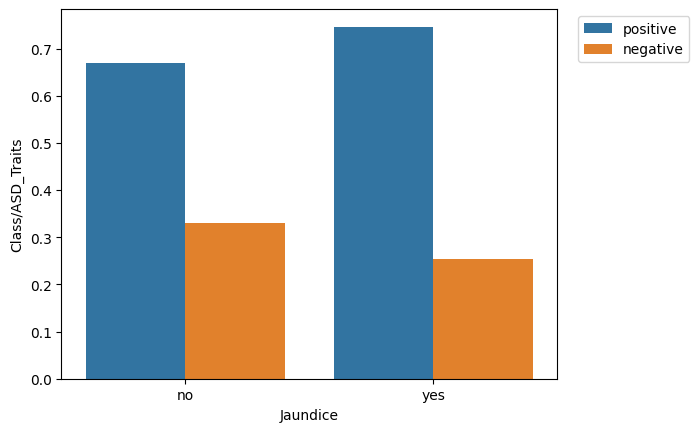

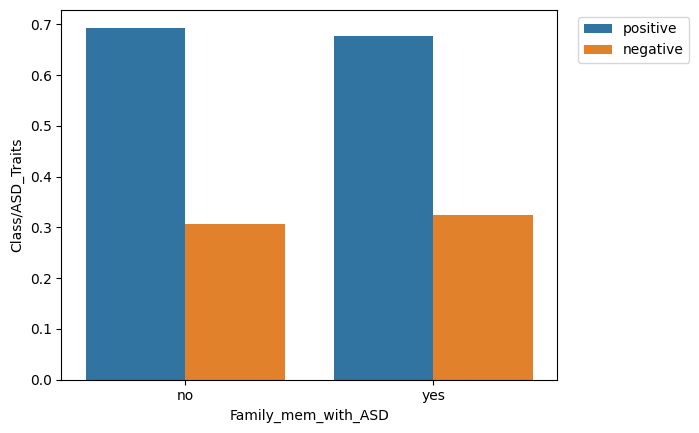

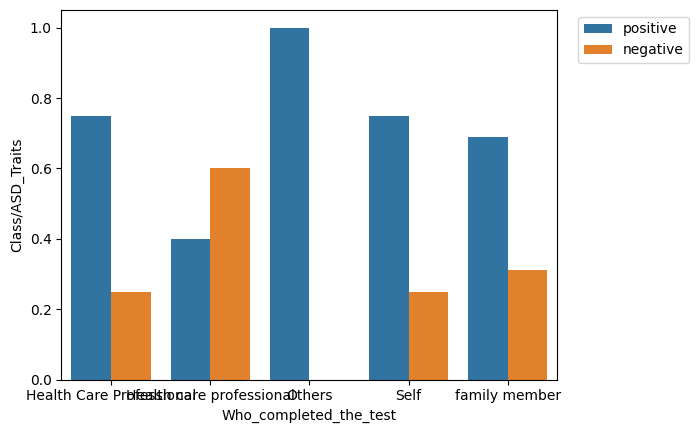

In [9]:

# # - Draw histogram for each column with class/asd to see which columns Influential in class/ASD -
bin_data=pd.DataFrame.copy(data)

# # #----------------Encode class/asd_traits values to 0 1 ------------------------------
bin_data['Class/ASD_Traits'] = bin_data['Class/ASD_Traits'].apply(lambda x: 1 if x=="Yes" else 0)

for column_name in data.columns:
    if(column_name == 'Class/ASD_Traits'):
        continue;
    group_by_modelLine = bin_data[[column_name,'Class/ASD_Traits']].groupby(by=[column_name])
    # --------------------- get mean to draw histogram ---------------------    
    mean=group_by_modelLine.mean().reset_index()
    mean.columns=[column_name,'positive']
    mean['negative']=mean['positive'].apply(lambda x: 1-x)
    mean=pd.melt(mean, id_vars=column_name, var_name="Pos/Neg", value_name="Class/ASD_Traits")
    p=sns.barplot(x=column_name, y='Class/ASD_Traits', hue='Pos/Neg', data=mean.reset_index())
    p.legend(loc='best', bbox_to_anchor=(1.28, 1), ncol=1)
    plt.show()

In [10]:
# # --------------------- The columns will not change ---------------------
org_data = data[
    [
        "A1",
        "A2",
        "A3",
        "A4",
        "A5",
        "A6",
        "A7",
        "A8",
        "A9",
        "A10",
        "Age_Mons",
    ]
]

# --------------------- The columns wich will be encoded using label encoding -------------------
label_data = data[
    [
        "Sex",
        "Jaundice",
        "Family_mem_with_ASD",
        "Class/ASD_Traits",
    ]
]


label_data['Sex'] = label_data['Sex'].apply(lambda x: 1 if x == "m" else 0)

label_data['Jaundice'] = label_data['Jaundice'].apply(lambda x: 1 if x == "yes" else 0)

label_data['Family_mem_with_ASD'] = label_data['Family_mem_with_ASD'].apply(lambda x: 1 if x == "yes" else 0)

label_data["Class/ASD_Traits"] = label_data["Class/ASD_Traits"].apply(lambda x: 1 if x == "Yes" else 0)



C:\Users\DELL\AppData\Local\Temp\ipykernel_9440\796284577.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['Sex'] = label_data['Sex'].apply(lambda x: 1 if x == "m" else 0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9440\796284577.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['Jaundice'] = label_data['Jaundice'].apply(lambda x: 1 if x == "yes" else 0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9440\796284577.py:33: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [11]:
# --------------------- The columns wich will be encoded using one hot encoding -----------------
one_hot_encoded_data = data[
    ["Ethnicity", "Who_completed_the_test"]
]

one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data)

In [24]:
#----------------------conct all data------------------------------------
final_data = pd.concat([org_data,label_data,one_hot_encoded_data],axis=1)
final_data = final_data.reset_index(drop=True)
#final_data=final_data.drop(['Unnamed: 0'],axis=1)
#final_csv_data = final_data.to_csv('final.csv', index = True) 
final_data.head()



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who_completed_the_test_Health Care Professional,Who_completed_the_test_Health care professional,Who_completed_the_test_Others,Who_completed_the_test_Self,Who_completed_the_test_family member
0,0,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,False,True
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True


In [32]:
final = pd.read_csv('final.csv')


In [45]:
#-----------------------separting input and outpput data----------------------------

x = final_data.drop(columns='Class/ASD_Traits')
y = final_data['Class/ASD_Traits']
x.shape

(1054, 30)

In [53]:
# --------------------- Splitting data for test data and train data ---------------------
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=32)
x_train,x_val,y_train,y_val   = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

for x in x_val:
    print(x)
    

A1


In [48]:
def plot_pricision_recall(model,X_test,y_test,title_name):
    # -------- get probability of Prediction for true result only using predict_proba func. --------
    y_pred = model.predict_proba(X_test)[:,1]

    # -------- get precision,recall and thresholds to Drawing the curve to clarify result ----------
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    
    # --------------------- Intialize Graph ---------------------
    plt.xlabel("Threshhold")
    plt.ylabel("Precision/Recall")
    plt.title('Precision/Recall '+title_name)

    # --------------------- Drawing the graph ---------------------
    plt.plot(thresholds,precision[:-1],label='Precision')
    plt.plot( thresholds,recall[:-1], label='Recall')

    # --------------------- Set Legend on the graph ---------------------
    plt.legend(bbox_to_anchor=(1.28,1), loc='best', borderaxespad=0.)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


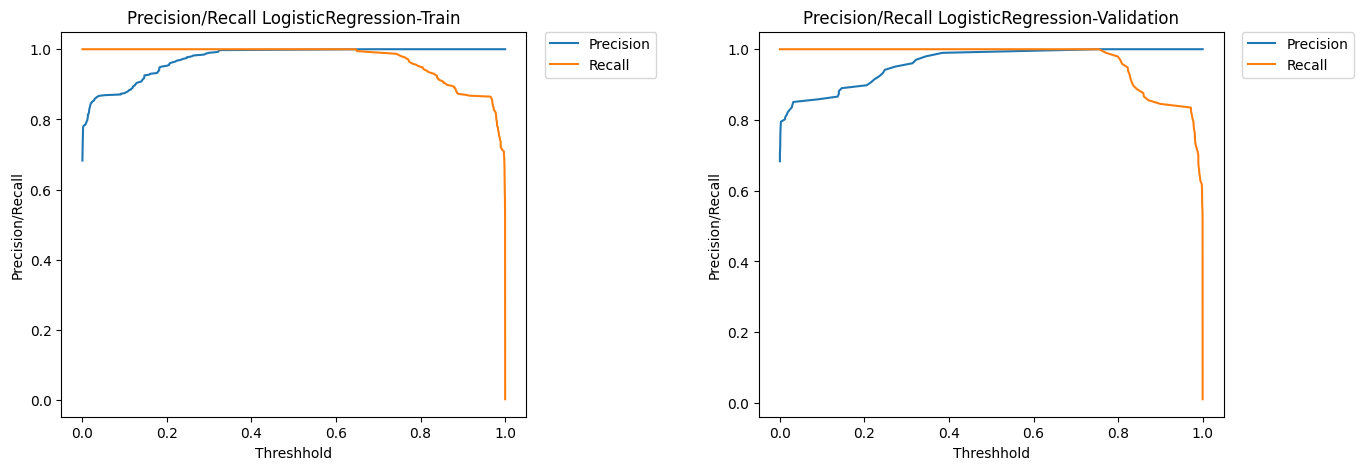

In [49]:
#---------------Create Logistic Regression Model---------------

lf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(x_train,y_train)

plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plot_pricision_recall(lf,x_train,y_train,'LogisticRegression-Train')
plt.subplot(122)
plot_pricision_recall(lf,x_val,y_val,'LogisticRegression-Validation')
plt.show()

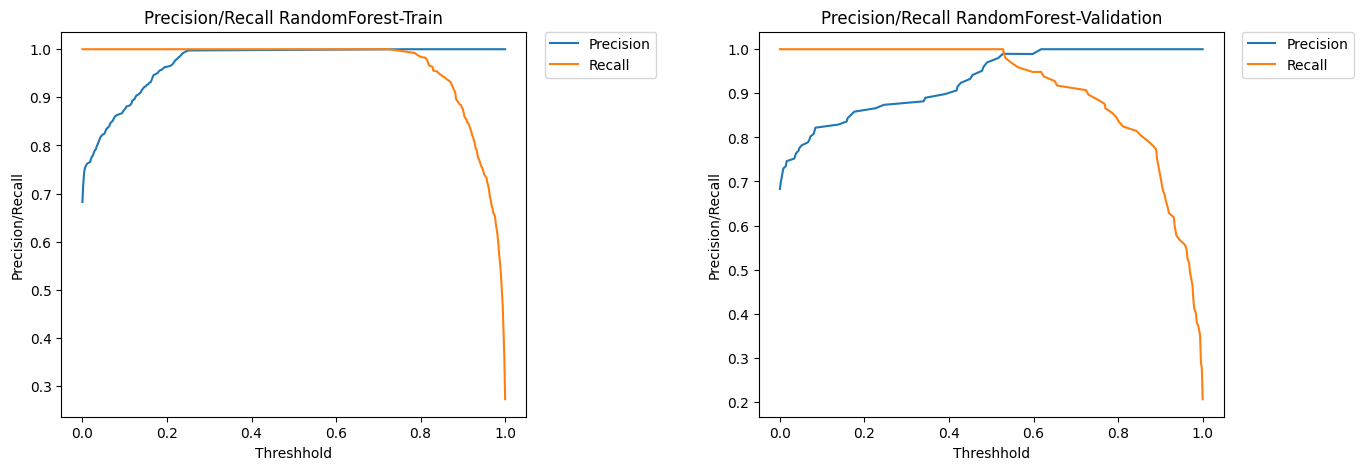

In [50]:
# --------------------- RandomForestClassifier ---------------------
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)

plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plot_pricision_recall(rfc,x_train,y_train,'RandomForest-Train')
plt.subplot(122)
plot_pricision_recall(rfc,x_val,y_val,'RandomForest-Validation')
plt.show()

In [51]:
##-----------------------SERIALIZING MODEL---------------------------------


from joblib import Parallel, delayed 
import joblib 
  
  
# Save the model as a pickle in a file 
joblib.dump(lf, 'logistic_regression_autism.pkl') 
joblib.dump(rfc, 'random_forest_autism.pkl') 
 

['random_forest_autism.pkl']

In [52]:
# Load the model from the file 
lf_from_joblib = joblib.load('logistic_regression_autism.pkl')
# Use the loaded model to make predictions 
lf_from_joblib.predict(x_test)


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,